# Lesson 4 Assignment - Autodetection of Breast Cancer

## Author - Connor Higgins

### Background
The <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">Breast Cancer Wisconsin (Diagnostic) Data set</a> contains donated data.
These data were obtained from the University of Wisconsin Hospitals, Madison. Donors:
1. Dr. William H. Wolberg, General Surgery Dept.
2. W. Nick Street, Computer Sciences Dept.
3. Olvi L. Mangasarian, Computer Sciences Dept.

They contain the simplified and normalized attributes used to detect breast cancer. Your task is to build
a decision tree classifier that would be able to detect, based on the attributes below, whether a tumor is
benign or malignant.

Attributes:
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitosis
11. Class (4 for malignant, 2 for benign)




### Importing Dataset

In [1]:
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/WI_Breast_Cancer.csv"
colnames = ['Sample_code' , 'Class', 'Clump_thick', 'Uni_cell_sz', 'Uni_cell_shp', 'Marg_adhes', 
             'Single_cell_sz', 'Bare_Nucl', 'Bland_Chr', 'Norm_Nucl', 'Mitosis']

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the decision tree is deterministic
np.random.seed(101)

In [3]:
# Loading file as dataframe, applying column names
df = pd.read_csv(URL)
df.columns = colnames
print('Wisconsin Breast Cancer Dataset')
print(df.info())
df.head()

Wisconsin Breast Cancer Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 11 columns):
Sample_code       708 non-null object
Class             701 non-null object
Clump_thick       701 non-null float64
Uni_cell_sz       700 non-null float64
Uni_cell_shp      700 non-null float64
Marg_adhes        700 non-null float64
Single_cell_sz    700 non-null float64
Bare_Nucl         700 non-null float64
Bland_Chr         700 non-null float64
Norm_Nucl         700 non-null float64
Mitosis           700 non-null object
dtypes: float64(8), object(3)
memory usage: 60.9+ KB
None


,Sample_code,Class,Clump_thick,Uni_cell_sz,Uni_cell_shp,Marg_adhes,Single_cell_sz,Bare_Nucl,Bland_Chr,Norm_Nucl,Mitosis
0,1002945,2,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
1,1015425,2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
2,1016277,2,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
3,1017023,2,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1
4,1017122,4,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1


### Cleaning and Summary Statistics

In [4]:
# Dropping Sample_code feature as it provides little information
df.drop('Sample_code', axis=1, inplace=True)

# Dropping any rows with more than 4 missing values
df.dropna(how='any', thresh=4, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 707
Data columns (total 10 columns):
Class             700 non-null object
Clump_thick       700 non-null float64
Uni_cell_sz       700 non-null float64
Uni_cell_shp      700 non-null float64
Marg_adhes        700 non-null float64
Single_cell_sz    700 non-null float64
Bare_Nucl         700 non-null float64
Bland_Chr         700 non-null float64
Norm_Nucl         700 non-null float64
Mitosis           700 non-null object
dtypes: float64(8), object(2)
memory usage: 60.2+ KB


In [5]:
# Fixing mislabelled values in Mitosis feature
mask = df['Mitosis'].str.startswith('3')
df.loc[mask, 'Mitosis'] = 3
df['Mitosis'] = df['Mitosis'].astype(float)
df['Mitosis'].value_counts()

1.0     578
3.0      35
2.0      35
10.0     14
4.0      12
7.0       9
8.0       8
5.0       6
6.0       3
Name: Mitosis, dtype: int64

Group Frequency per Feature within the Wisconsin Breast Cancer Dataset


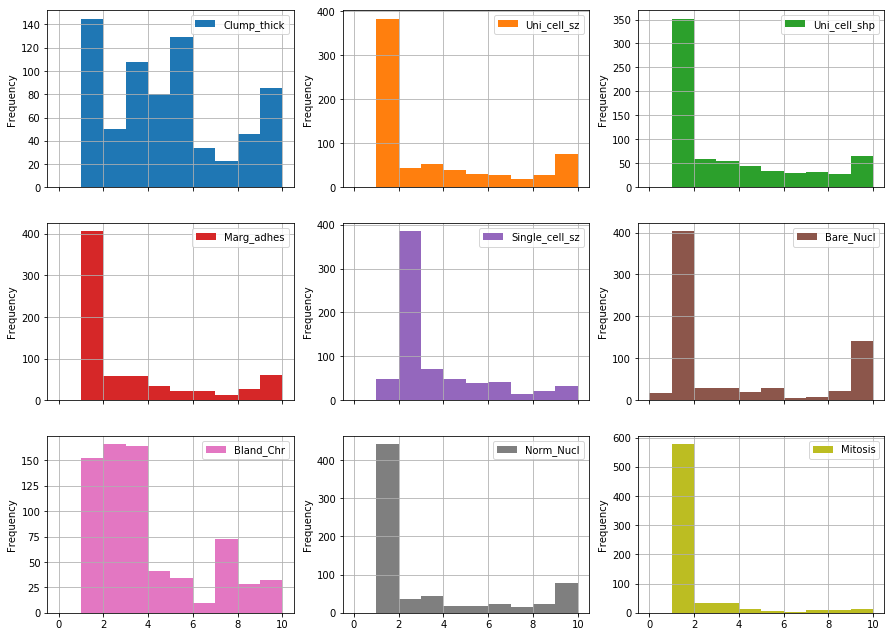

In [6]:
# Plotting Histogram for each Feature
print('Group Frequency per Feature within the Wisconsin Breast Cancer Dataset')
df.plot(kind='hist', subplots=True, layout=(4,3), figsize=(15,15), grid=True)
plt.show()

### Fitting Initial Decision Tree Models to Data

In [7]:
# Converting Target values to 1 (malignant, originally '4') and 0 (benign, originally '2')
df.loc[df['Class'] == '4', 'Class'] = 1
df.loc[df['Class'] == '2', 'Class'] = 0

# Obtaining X feature and Y target matrices from df dataframe
X = df.drop('Class', axis=1).values
Y = df['Class'].values

# Splitting the data into training (90%) and testing (10%) portions
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape} | y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape} | y_test shape: {y_test.shape}")
print(f"\nX_train: \n{X_train}")

X_train shape: (560, 9) | y_train shape: (560,)
X_test shape: (140, 9) | y_test shape: (140,)

X_train: 
[[ 3.  1.  1. ...  7.  1.  1.]
 [10.  3.  6. ...  4. 10.  2.]
 [10.  6.  4. ...  9. 10.  1.]
 ...
 [ 5.  1.  1. ...  3.  1.  1.]
 [10. 10. 10. ...  2.  8.  1.]
 [ 8.  2.  3. ...  7.  1.  1.]]


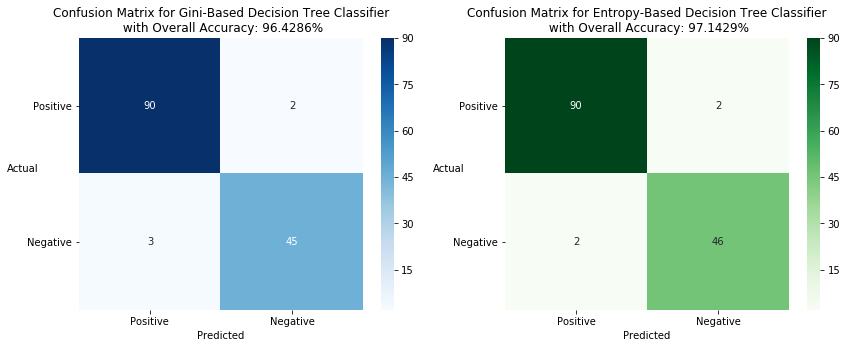

In [8]:
# Fitting Gini and Entropy initial models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

dt_gini_model = DecisionTreeClassifier(criterion='gini', random_state=42).fit(X_train, y_train)
y_gini_pred = dt_gini_model.predict(X_test)

dt_ent_model = DecisionTreeClassifier(criterion='entropy', random_state=42).fit(X_train, y_train) 
y_ent_pred = dt_ent_model.predict(X_test)

# Comparing accuracy and perfomance of both models
from sklearn.metrics import accuracy_score, confusion_matrix

def conf_mat_heatmap_and_acc(y_test, y_pred, label='Classifier', subplot=111, cmap='Blues'):
    """Returns confusion matrix heatmap and accuracy score for given y_test and y_pred"""
    acc_score = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    ax= plt.subplot(subplot)
    sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax, cmap=cmap)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual', rotation=0)
    ax.xaxis.set_ticklabels(['Positive', 'Negative'])
    ax.yaxis.set_ticklabels(['Positive', 'Negative'], rotation=0)
    ax.set_title(f'Confusion Matrix for {label}\n with Overall Accuracy: {acc_score*100:.4f}%')
    return 

fig = plt.figure(figsize=(14,5))
conf_mat_heatmap_and_acc(y_test, y_gini_pred, 'Gini-Based Decision Tree Classifier', 121)
conf_mat_heatmap_and_acc(y_test, y_ent_pred, 'Entropy-Based Decision Tree Classifier', 122, 'Greens')
plt.show()

#### 1. Test both entropy and the gini coefficient. Which performs better and why?
Using default hyperparameter settings for both models, the entropy criterion model performs slightly better, correctly classifying one more case as benign (TN). With a larger test set, the difference in performance may become more apparent. As to why entropy performs better, it is more suited to cateogrical attributes than gini, which is more suited to continuous attributes. This aligns with the data, where values are discrete integers from 1 to 10.

Decision Tree with Gini Criterion (Default Hyperparameters)


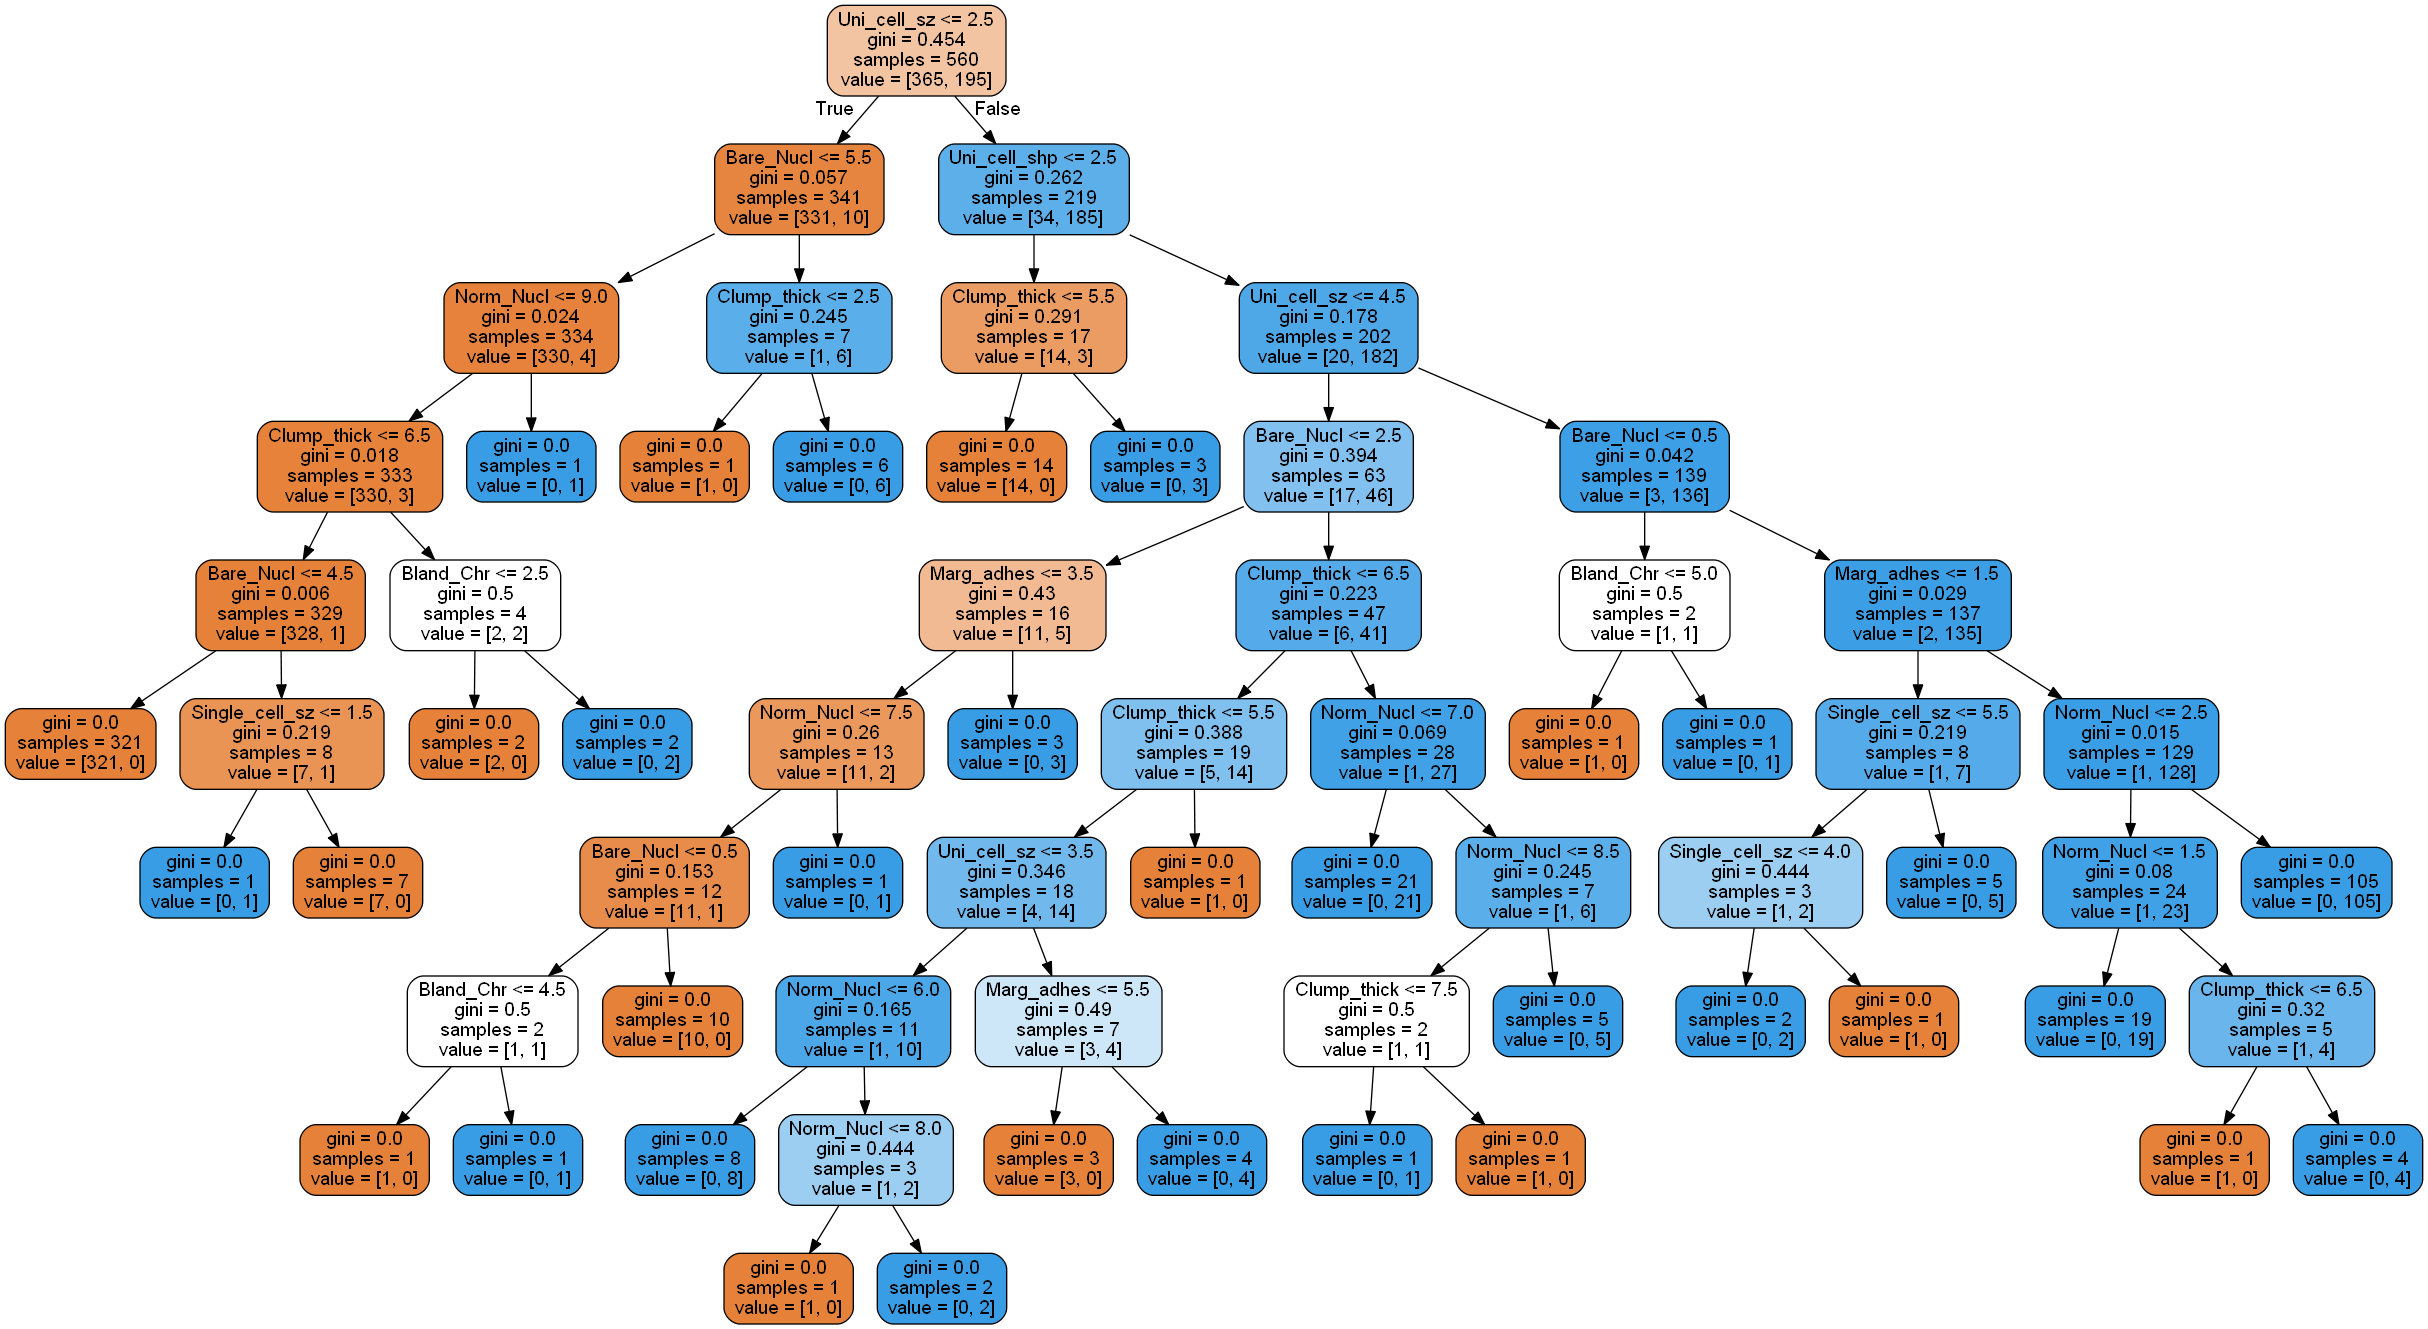

In [9]:
# Obtaining visual decision trees for both models
feature_names = list(df.columns)
feature_names.remove('Class')

def display_decision_tree(model, file_name, model_name, feature_names):
    """Displays .png conversion of .dot file of export_graphiz visualization of a given model"""
    import os
    from sklearn import tree
    from IPython.display import Image
    dotfile = open(f"{file_name}.dot", 'w')
    tree.export_graphviz(model, out_file=dotfile, filled=True, rounded=True, feature_names=feature_names)
    dotfile.close()
    os.system(f"dot -Tpng {file_name}.dot -o {file_name}.png")
    print(model_name)
    return Image(filename=f'{file_name}.png', width=1000, height=1000)
    
display_decision_tree(dt_gini_model, 'dt_gini_initial',
                      'Decision Tree with Gini Criterion (Default Hyperparameters)', feature_names)

Decision Tree with Entropy Criterion (Default Hyperparameters)


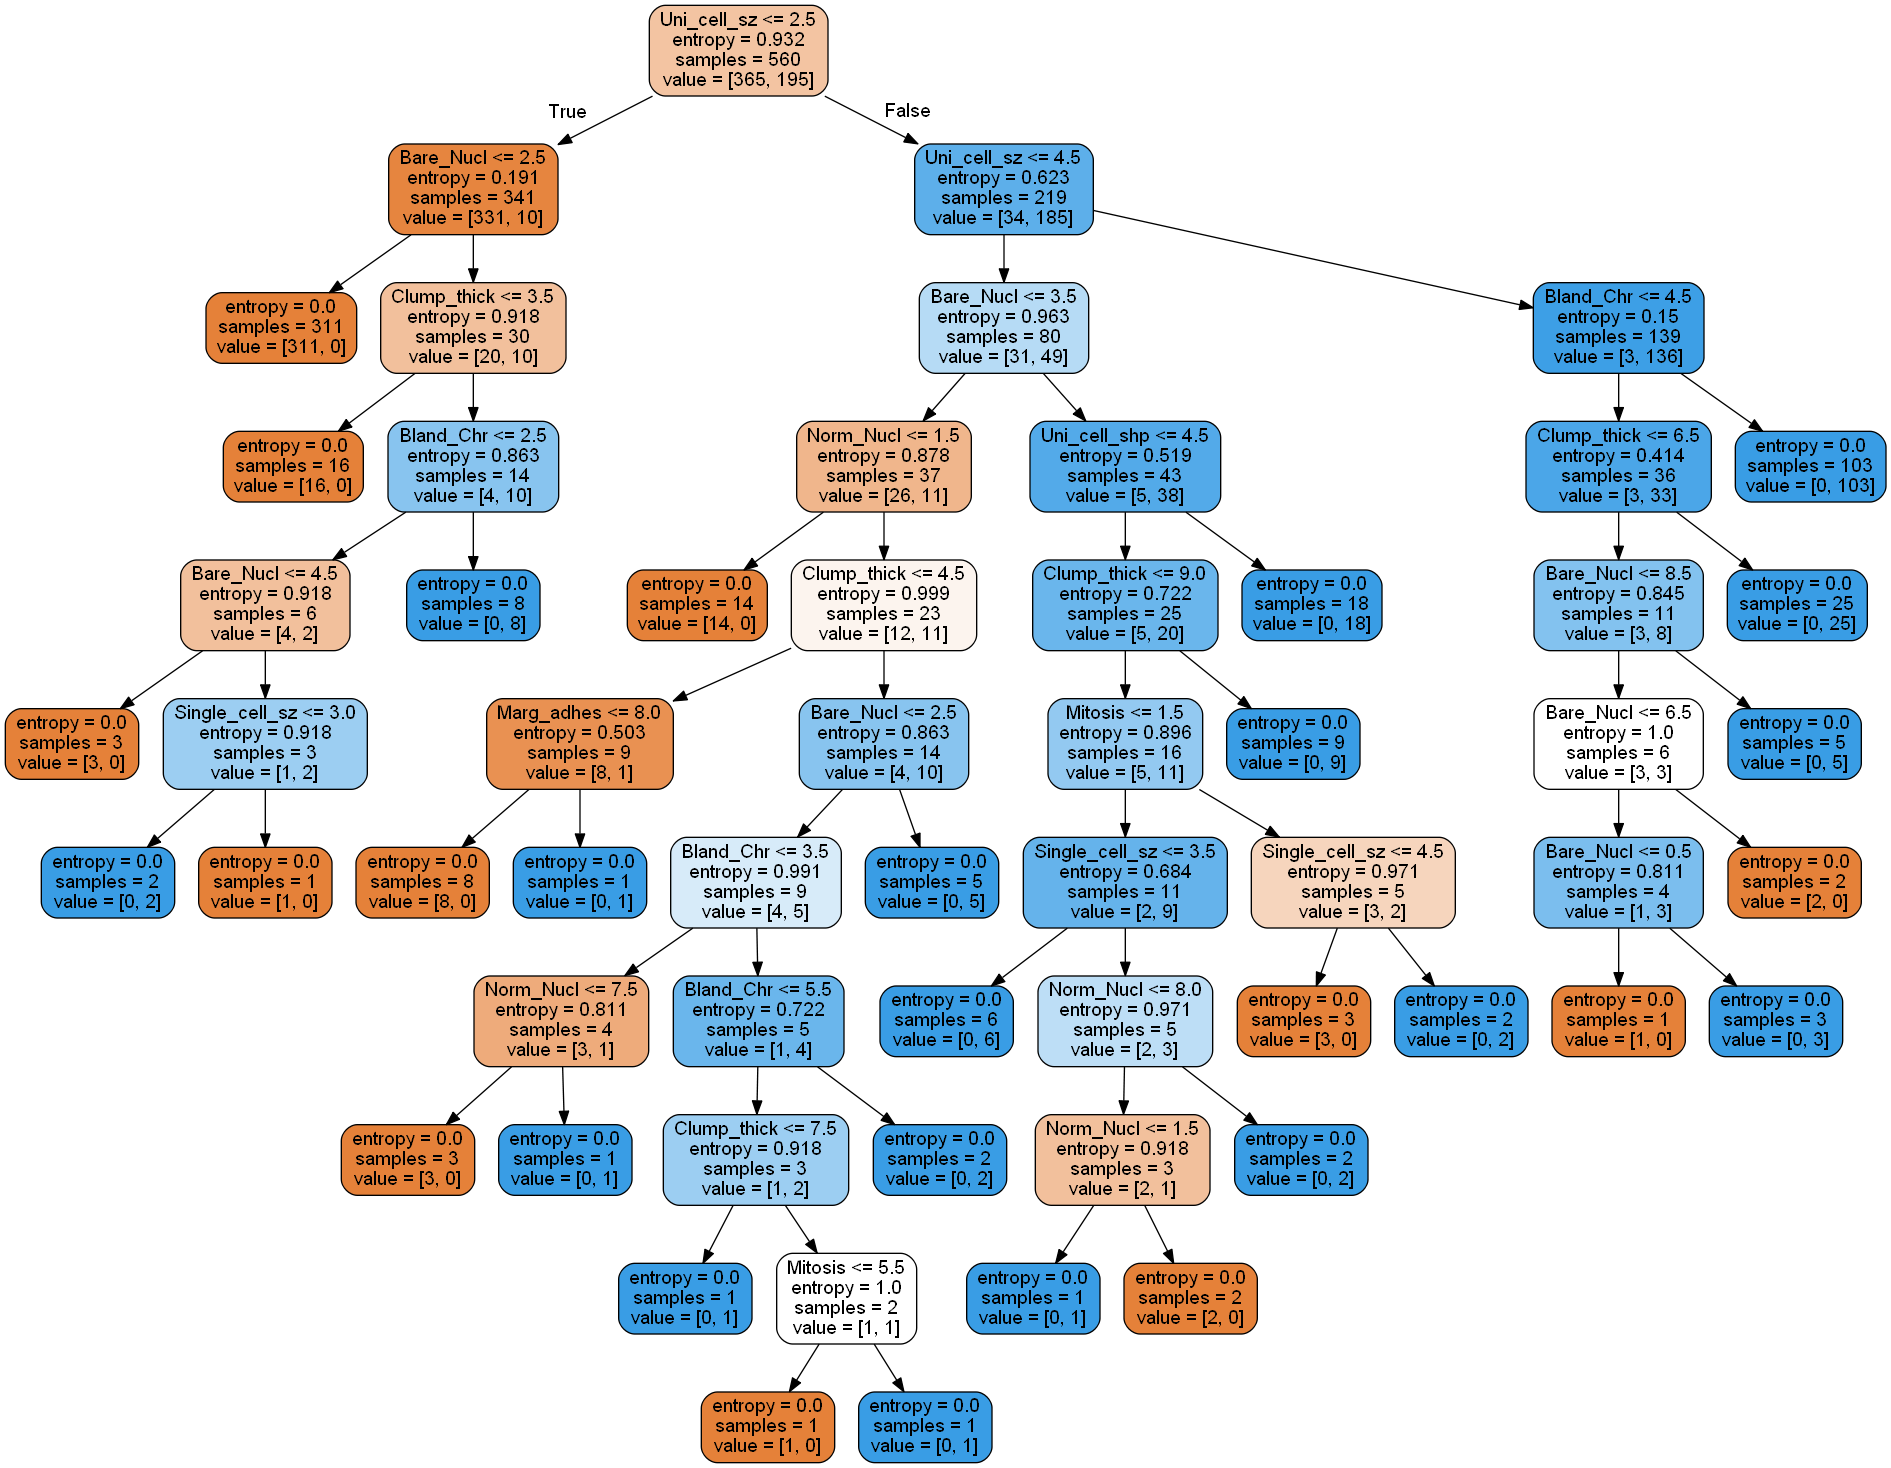

In [10]:
display_decision_tree(dt_ent_model, 'dt_ent_initial',
                      'Decision Tree with Entropy Criterion (Default Hyperparameters)', feature_names)

### Testing Hyperparameters for both Gini and Entropy-based Decision Tree models

In [11]:
# Testing Gini-based Decision Tree for the best set of hyperparameters

splitters = ['best', 'random']
max_depths = [x for x in range(2, 11)]
max_depths.append(None)
max_featuress = [x for x in range(1, 10)]

def decision_tree_model_eval(criterion, splitters, max_depths, max_featuress):
    """ Takes a criterion (gini or entropy) and 3 lists of hyperparameters.
    Returns a description of the best model based on AUC score as well 
    as a dictionary of all related values and parameters.
    """
    models = []
    y_preds = []
    acc_scores = []
    auc_scores = []
    fprs = []
    tprs = []
    thresholdss = []
    params_list = []
    for splitter in splitters:
        for max_depth in max_depths:
            for max_features in max_featuress:
                dt_model = DecisionTreeClassifier(
                    criterion=criterion, splitter=splitter, max_depth=max_depth,
                    max_features=max_features, random_state=42
                ).fit(X_train, y_train)
                models.append(dt_model)
                y_pred = dt_model.predict(X_test)
                y_preds.append(y_pred)
                acc_score = accuracy_score(y_test, y_pred)
                acc_scores.append(acc_score)
                y_scores = dt_model.predict_proba(X_test)
                auc_score = roc_auc_score(y_test, y_scores[:,1])
                auc_scores.append(auc_score)
                fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
                fprs.append(fpr)
                tprs.append(tpr)
                thresholdss.append(thresholds)
                params = [splitter, max_depth, max_features]
                params_list.append(params)           
    best = auc_scores.index(max(auc_scores))    
    print(f'The best decision tree model using the {criterion} criterion' 
          f' had an AUC score of {max(auc_scores):.4f},\n'
          f'had an accuracy score of {acc_scores[best]*100:.2f}%,'
          f' used \'{params_list[best][0]}\' as its method for splitting,\n'
          f'had a max depth of {params_list[best][1]},'
          f' and used a maximum of {params_list[best][2]} features per split.')
    return {'acc_score' : acc_scores[best], 'auc_score': auc_scores[best],
            'fpr' : fprs[best], 'tpr' : tprs[best],
            'thresholds' : thresholdss[best], 'params' : params_list[best],
            'model' : models[best], 'y_pred' : y_preds[best]}

#### 2. What are the best hyperparameter settings for both?

In [12]:
# Testing Gini-based Decision Tree for the best set of hyperparameters
dt_results_gini = decision_tree_model_eval('gini', splitters, max_depths, max_featuress)

The best decision tree model using the gini criterion had an AUC score of 0.9975,
had an accuracy score of 98.57%, used 'random' as its method for splitting,
had a max depth of 5, and used a maximum of 7 features per split.


In [13]:
# Testing Entropy-based Decision Tree for the best set of hyperparameters
dt_results_entropy = decision_tree_model_eval('entropy', splitters, max_depths, max_featuress)

The best decision tree model using the entropy criterion had an AUC score of 0.9967,
had an accuracy score of 98.57%, used 'random' as its method for splitting,
had a max depth of 6, and used a maximum of 2 features per split.


#### 3. Visualize both models and see which feature is selected for each criterion. Are they same for both? Why or why not?

Decision Tree with Gini Criterion (Best Hyperparameters)


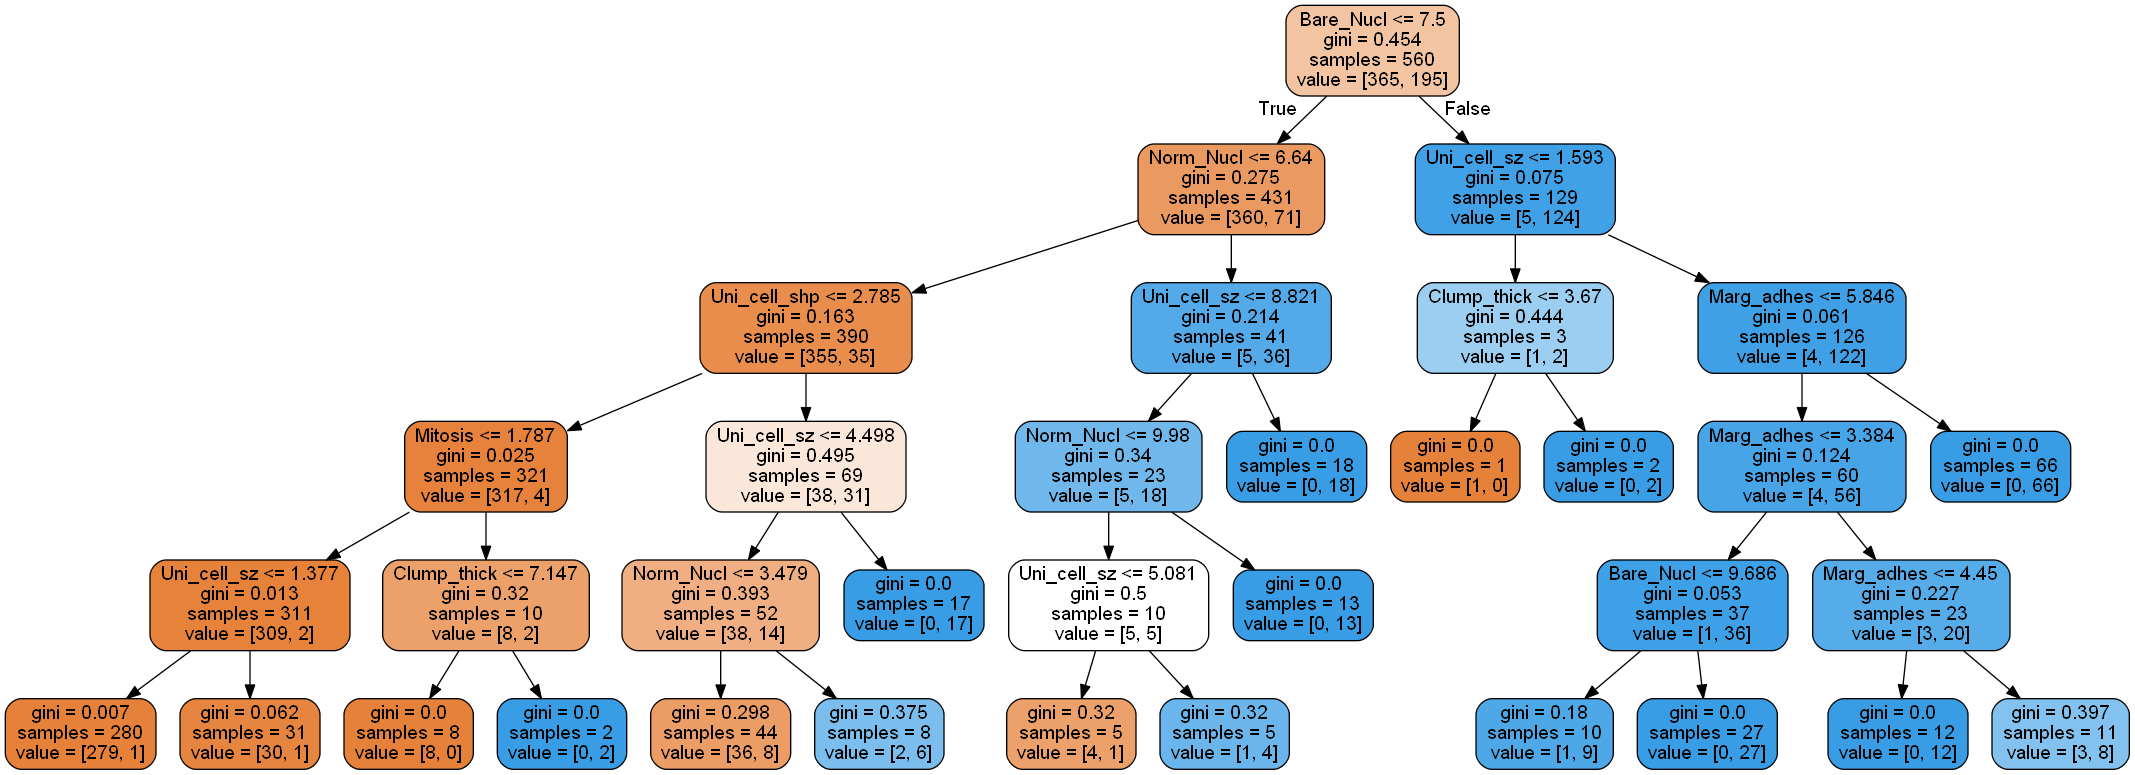

In [14]:
display_decision_tree(dt_results_gini['model'], 'dt_gini_final',
                      'Decision Tree with Gini Criterion (Best Hyperparameters)', feature_names)

The gini criterion decision tree split first using Bare_Nucl, followed by Norm_Nucl and Uni_cell_sz for the second split, followed by Uni_cell_shp, Uni_cell_sz, Clump_thick and Marg_adhes for the third split. Overall, the model had a max_depth of 5 with 18 end leaf nodes.

Decision Tree with Entropy Criterion (Best Hyperparameters)


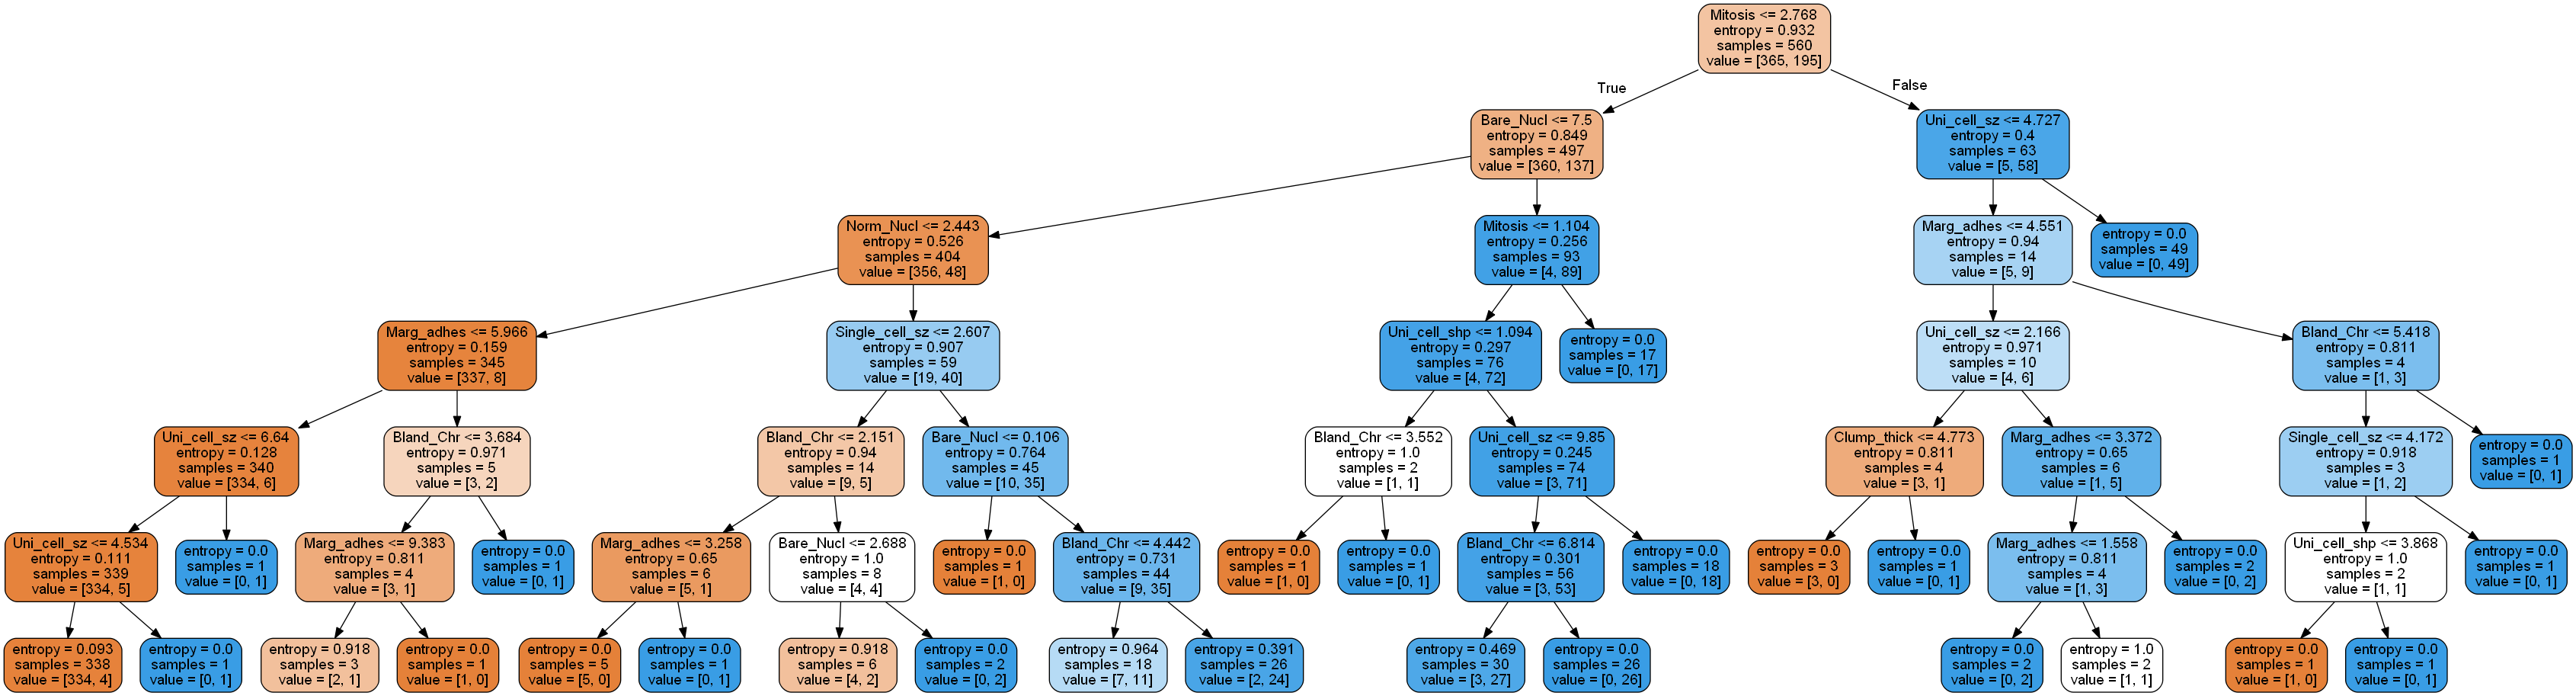

In [15]:
display_decision_tree(dt_results_entropy['model'], 'dt_entropy_final',
                      'Decision Tree with Entropy Criterion (Best Hyperparameters)', feature_names)

The entropy criterion decision tree split first using Mitosis, followed by Bare_Nucl and Uni_cell_sz for the second split, followed by Norm_Nucl, Uni_cell_sz, Mitosis, and Marg_adhes for the third split. Overall, the model had a max_depth of 6 with 29 end leaf nodes.

Comparing both models, the first split feature was different (Bare_Nucl v. Mitosis) though both used Uni_cell_sz for the second split. Moreover, Bare_Nucl, Norm_Nucl, Uni_cell_sz and Marg_adhes were used in both models within the first three splits, implying their importance. As for why the two models differ on the feature used for the first split, it's due to the difference in how gini and entropy are calculated. Gini considers the probability of a random sample being classified incorrectly if a label is picked randomly according to the frequency distribution within a potential branch. Entropy, on the other hand, decides splits based on the degree to which information is gained, reducing overall uncertainty of the label. The former is primarly concerned with reducing inaccuracies while the latter is primarily concerned with increasing the information gained. As a result, the splits chosen by each model reflect the best feature according to these objectives, and oftentimes this can result in discrepancies.

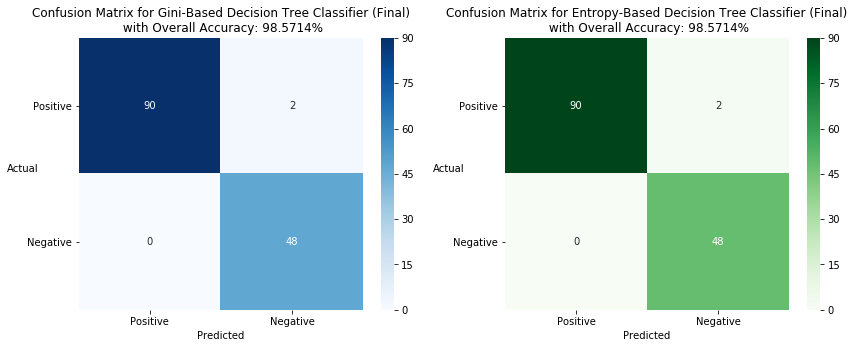

In [16]:
fig = plt.figure(figsize=(14,5))
conf_mat_heatmap_and_acc(y_test, dt_results_gini['y_pred'], 'Gini-Based Decision Tree Classifier (Final)', 121)
conf_mat_heatmap_and_acc(y_test, dt_results_entropy['y_pred'], 'Entropy-Based Decision Tree Classifier (Final)', 122, 'Greens')
plt.show()

In terms of accuracy, both models performed equally, both incorrectly classifying just two cases as benign when they were actually malignant. When considering the context of this dataset, accuracy clearly shouldn't be the key metric to maximize. Rather, recall likely would make the better metric as we are primarly concerned with correctly identifying all malignant cases. 

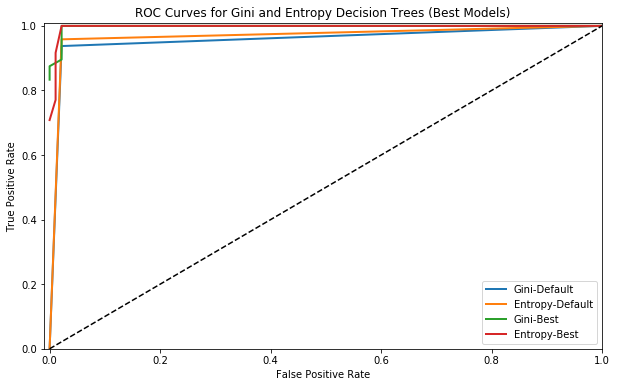

In [17]:
# Obtaining fpr and tpr for initial models, to allow for comparison with best models
y_gini_scores = dt_gini_model.predict_proba(X_test)
gini_fpr, gini_tpr, _ = roc_curve(y_test, y_gini_scores[:,1])
y_ent_scores = dt_ent_model.predict_proba(X_test)
ent_fpr, ent_tpr, _ = roc_curve(y_test, y_ent_scores[:,1])

# Plotting both best and default gini and entropy models
plt.figure(figsize=(10,6))
plt.plot(gini_fpr, gini_tpr, linewidth=2, label='Gini-Default')
plt.plot(ent_fpr, ent_tpr, linewidth=2, label='Entropy-Default')
plt.plot(dt_results_gini['fpr'], dt_results_gini['tpr'], linewidth=2, label='Gini-Best')
plt.plot(dt_results_entropy['fpr'], dt_results_entropy['tpr'], linewidth=2, label='Entropy-Best')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Gini and Entropy Decision Trees (Best Models)')
plt.legend()
plt.show()

#### 4. Determine the AUC for the best model you can achieve. What are the precision and recall values and which might be the one you want to maximize?

Using the gini criterion, the best model acheived an AUC score of 0.9975; using the entropy criterion, the best model acheived an AUC score of 0.9967. Given the performances of the initial models, where the entropy-based model performed slightly worse, it was expected that this would be reflect in the AUC score, yet the gini-based model performed slightly better on this metric. With gini primarily focused on reducing the inaccuracies in any splits made, it would appear that this method is more effective than seeking to maximize information gained for this particular dataset. As mentioned, all attributes contain discrete integers ranging from 1 to 10. While not continuous, as these value increase so to does the underlying attribute, meaning that gini, known for working well with continuous attributes, could be a better choice than entropy, which is better with purely categorical attributes.

The precision and recall values for the gini-based model were 100% and 97.82% resepctively. These values were identical for the entropy-based model. As stated previously, it makes far more sense to maximize recall rather than precision. If the model were to be used in a real-world setting, the objective would be to correctly identify all malignant cases, even if some benign cases are incorrectly flagged. Conversely, maximizing precision would mean that some malignant cases could get through, an outcome that could result in the death of a patient.

#### 5.  What are the implications of using this type of machine learning algorithm for breast cancer analysis?

In binary classification problems, the importance of recall and precision depends greatly on the real world scenario associated with the data. In the case of breast cancer analysis, the goal is to correctly identify all malignant cases, even if this results in several cases being incorrectly flagged as malignant when the result was actually benign. While no one would be happy with believing they have a malignant form of breast cancer, this scenario is far more tolerable than if a patient dies from cancer that was incorrectly screened as benign. As a result, recall is the key metric should be considered.

Additionally, decision trees give the added benefit of describing each decision in detail, as they are white-box algorithms. This trait can allow us to detemine which features are most salient when assessing whether a case is malignant. Bare_Nucl, Norm_Nucl, Uni_cell_sz and Marg_adhes were features used by the best models of either criteria within the first three splits. We can assume then that these properties vary considerably between populations of malignant and benign cells. A black-box model would not necessarily give us this same level of information. 